In [3]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import scipy.stats as stats
import plotly.graph_objects as go

# I. Organizing

In [4]:
# Reads Csv Files, Kenya radically skewed the data therefore I made a subCsv without kenya for analyzing.
df = pd.read_csv('africaFood.csv')
noKenya = pd.read_csv("noKenya.csv")

In [5]:
# Turns all scientific notation into "regular" numbers.
pd.options.display.float_format = '{:20,.2f}'.format

In [6]:
# 1. Organized the columns into three sectors: Fishing, Farming, and Livestock.
# 2. Filled all the Nans with 0, for computing sakes, this will skew the data, I will touch on that in the analyze segment
# 3. Creates columns adding the specific columns of a certain sector, to have an overall, sector production variable.
# 3. The math didnt support a reputable total column, so I made my own sector totals, and then added them up for my own totals named Calculated_Total. 
# 4. Created a subset organizing a variable from highest to lowest, can be done with any variable, but I decided to go with Calculated_Total
# 5. Created an input function that organizes data from hight to low, and low to high based off the inputted variable.
# 6. Created subsets oragnizing each county by their ranked production.


In [7]:
# First five datapoints
df.head()

,County,Total,Farming,Crop Production,Livestock Production,Aquaculture,Fishing,Irrigation,Maize,Sorghum,...,Camels,Donkeys,Pigs,Indigenous Chicken,Exotic Chicken Layers,Exotic Chicken Broilers,Beehives,Rabbits,Fish Ponds,Fish Cages
0,KENYA,12143913,"6,354,211.00",5555974,4729288,29325,109640,369679,"5,104,967.00","904,945.00",...,"167,666.00",500682,"110,383.00",3337700,194517,79461,201406,124122,"22,019.00","3,361.00"
1,MOMBASA,378422,"12,497.00",7218,8749,128,1409,958,"5,681.00",nan,...,6.00,36,134.00,6142,743,998,68,186,83.00,24.00
2,CHANGAMWE,46614,618.00,230,476,6,62,36,108.00,nan,...,0.00,1,7.00,350,53,78,1,14,6.00,0.00
3,JOMVU,53472,"2,418.00",1168,1810,12,132,209,895.00,nan,...,0.00,11,37.00,1296,157,199,6,30,8.00,3.00
4,KISAUNI,88202,"6,257.00",4043,4269,67,492,402,"3,456.00",nan,...,4.00,8,76.00,3016,280,411,41,79,37.00,11.00


In [8]:
# Last five datapoints
df.tail()

,County,Total,Farming,Crop Production,Livestock Production,Aquaculture,Fishing,Irrigation,Maize,Sorghum,...,Camels,Donkeys,Pigs,Indigenous Chicken,Exotic Chicken Layers,Exotic Chicken Broilers,Beehives,Rabbits,Fish Ponds,Fish Cages
388,MAKADARA,70361,639.00,199,503,4,14,45,106.00,nan,...,5.00,51,371.00,106,63,4,34,2,1.00,nan
389,MATHARE,74967,735.00,298,560,6,28,62,178.00,0.00,...,15.00,42,381.00,120,69,12,33,4,2.00,nan
390,NJIRU,204563,"10,642.00",4642,8484,46,117,886,"2,950.00",0.00,...,141.00,364,"6,636.00",1125,607,20,418,39,5.00,nan
391,STAREHE,69389,483.00,279,316,14,22,63,158.00,nan,...,7.00,10,230.00,57,34,9,19,7,2.00,nan
392,WESTLANDS,104980,"1,800.00",1292,902,37,70,303,738.00,nan,...,4.00,48,584.00,162,81,13,47,27,9.00,nan


In [9]:
# Fills all NaN with 0's, this will influence descriptive statistics, and calculations.
df = df.fillna(0)

In [10]:
df.head()

,County,Total,Farming,Crop Production,Livestock Production,Aquaculture,Fishing,Irrigation,Maize,Sorghum,...,Camels,Donkeys,Pigs,Indigenous Chicken,Exotic Chicken Layers,Exotic Chicken Broilers,Beehives,Rabbits,Fish Ponds,Fish Cages
0,KENYA,12143913,"6,354,211.00",5555974,4729288,29325,109640,369679,"5,104,967.00","904,945.00",...,"167,666.00",500682,"110,383.00",3337700,194517,79461,201406,124122,"22,019.00","3,361.00"
1,MOMBASA,378422,"12,497.00",7218,8749,128,1409,958,"5,681.00",0.00,...,6.00,36,134.00,6142,743,998,68,186,83.00,24.00
2,CHANGAMWE,46614,618.00,230,476,6,62,36,108.00,0.00,...,0.00,1,7.00,350,53,78,1,14,6.00,0.00
3,JOMVU,53472,"2,418.00",1168,1810,12,132,209,895.00,0.00,...,0.00,11,37.00,1296,157,199,6,30,8.00,3.00
4,KISAUNI,88202,"6,257.00",4043,4269,67,492,402,"3,456.00",0.00,...,4.00,8,76.00,3016,280,411,41,79,37.00,11.00


In [11]:
# Creates columns adding the specific columns of a certain sector, and adding them up to have an overall, sector production variable
df["Water_Total"] = df["Aquaculture"] + df["Fishing"] + df["Irrigation"] + df["Fish Ponds"] + df["Fish Cages"]
df["Farm_Total"] = df["Maize"] + df["Sorghum"] + df["Rice"] + df["Potatoes"] + df["Beans"] + df["Cassava"] + df["Sweet Potatoes"] + df["Wheat"] + df["Green grams"] + df["Bananas"] + df["Cabbages"] + df["Tomatoes"] + df["Onions"] + df["Ground Nuts"] + df["Millet"] + df["Watermelons"] + df["Kales"] + df["Sugarcane"] + df["Cotton"]
df["Livestock_Total"] = df["Exotic cattle 0Dairy"] + df["Exotic cattle 0Beef"] + df["Indigenous cattle"] + df["Sheep"] + df["Sheep"] + df["Goats"] + df["Camels"] + df["Donkeys"] + df["Pigs"] + df["Indigenous Chicken"] + df["Exotic Chicken Layers"] + df["Exotic Chicken Broilers"] + df["Beehives"] + df["Rabbits"] 
df["Calculated_Total"] = df['Water_Total'] + df['Farm_Total'] + df['Livestock_Total'] 

In [12]:
# Creates sector based subsets, with sector total, and calculated totals
Fishing = df[["County" , "Calculated_Total", "Water_Total", "Aquaculture", "Fishing","Irrigation","Fish Ponds","Fish Cages"]]
Farm = df[["County","Calculated_Total","Farm_Total", "Farming","Crop Production","Maize","Sorghum","Rice","Potatoes","Beans","Cassava","Sweet Potatoes","Wheat","Green grams","Bananas","Cabbages","Tomatoes","Onions","Ground Nuts","Millet","Watermelons","Kales","Sugarcane","Cotton"]]
Livestock = df[["County","Calculated_Total","Livestock_Total", "Livestock Production","Exotic cattle 0Dairy","Exotic cattle 0Beef","Indigenous cattle","Sheep","Goats","Camels","Donkeys","Pigs","Indigenous Chicken","Exotic Chicken Layers","Exotic Chicken Broilers","Beehives","Rabbits"]]

In [13]:
# Organizes a variables from highest to lowest. Can be done with any variable, and also from low to high.
dfTotalAsc = df.sort_values(['Calculated_Total'], ascending=False)
calcTotalAsc = df.sort_values(["Calculated_Total"], ascending=False)
calcTotalAsc.head()

,County,Total,Farming,Crop Production,Livestock Production,Aquaculture,Fishing,Irrigation,Maize,Sorghum,...,Exotic Chicken Layers,Exotic Chicken Broilers,Beehives,Rabbits,Fish Ponds,Fish Cages,Water_Total,Farm_Total,Livestock_Total,Calculated_Total
0,KENYA,12143913,"6,354,211.00",5555974,4729288,29325,109640,369679,"5,104,967.00","904,945.00",...,194517,79461,201406,124122,"22,019.00","3,361.00","534,024.00","21,101,949.00","12,582,590.00","34,218,563.00"
288,KAKAMEGA,433207,"335,269.00",321945,235264,2223,3184,4970,"312,670.00","24,160.00",...,3802,2335,3956,2110,253.00,0.00,"10,630.00","1,473,805.00","496,434.00","1,980,869.00"
309,BUNGOMA,358796,"280,445.00",269979,197318,1530,1944,6310,"262,063.00","28,889.00",...,2341,3247,2587,1408,217.00,0.00,"10,001.00","1,246,657.00","429,380.00","1,686,038.00"
73,MERU,426360,"274,865.00",250493,201036,1089,1666,51587,"217,403.00","34,277.00",...,11192,6091,12278,12517,"1,011.00",112.00,"55,465.00","888,765.00","499,958.00","1,444,188.00"
248,NAKURU,616046,"283,652.00",261001,191468,565,2494,7942,"243,535.00","9,613.00",...,10631,3421,5935,7001,517.00,56.00,"11,574.00","891,666.00","498,687.00","1,401,927.00"


In [14]:
# Kenya really skewed a lot of these graphs, therefore I made a subset that ranks each country caclulated 
# totals by the quartile rankings received from descriptive statistics. Can be used to make subsets for any 
# caculated total, or any variable.
def f(row):
    if row['Calculated_Total'] > 152761:
        val = 'High Production'
    elif row['Calculated_Total'] > 113210:
        val = "Medium Production"
    elif row['Calculated_Total'] > 57701:
        val = "Low Production"  
    else: 
        val = "Very Low Production"
    return val
        
df["Calc_Ranking"] = df.apply(f, axis=1)

# Creates subsets oragnizing each county by their ranked production.
highProduction = df[df.Calc_Ranking =='High Production']
mediumProduction = df[df.Calc_Ranking =='Medium Production']
lowProduction = df[df.Calc_Ranking =='Low Production']
veryLowProduction = df[df.Calc_Ranking =='Very Low Production']

In [15]:
# Countries in the top 75% quartile of calculated, overall production.
highProduction.head()

,County,Total,Farming,Crop Production,Livestock Production,Aquaculture,Fishing,Irrigation,Maize,Sorghum,...,Exotic Chicken Broilers,Beehives,Rabbits,Fish Ponds,Fish Cages,Water_Total,Farm_Total,Livestock_Total,Calculated_Total,Calc_Ranking
0,KENYA,12143913,"6,354,211.00",5555974,4729288,29325,109640,369679,"5,104,967.00","904,945.00",...,79461,201406,124122,"22,019.00","3,361.00","534,024.00","21,101,949.00","12,582,590.00","34,218,563.00",High Production
8,KWALE,173176,"108,074.00",100020,72666,220,4452,2438,"93,143.00","2,784.00",...,836,573,179,201.00,57.00,"7,368.00","257,644.00","161,811.00","426,823.00",High Production
14,KILIFI,298472,"161,188.00",149334,101983,366,6393,5643,"143,913.00","2,911.00",...,1807,611,524,333.00,50.00,"12,785.00","316,145.00","198,957.00","527,887.00",High Production
31,TAITA/TAVETA,96429,"56,920.00",48382,43462,275,670,10225,"44,378.00","3,651.00",...,641,1857,1555,262.00,27.00,"11,459.00","180,066.00","105,711.00","297,236.00",High Production
36,GARISSA,141394,"47,645.00",4406,46154,1981,1411,1817,"2,590.00",748.00,...,832,833,285,0.00,0.00,"5,209.00","12,733.00","189,627.00","207,569.00",High Production


In [42]:
# Countries in the top 25-50% quartile of calculated, overall production.
mediumProduction.head()

,County,Total,Farming,Crop Production,Livestock Production,Aquaculture,Fishing,Irrigation,Maize,Sorghum,...,Exotic Chicken Broilers,Beehives,Rabbits,Fish Ponds,Fish Cages,Water_Total,Farm_Total,Livestock_Total,Calculated_Total,Calc_Ranking
10,LUNGALUNGA,37366,"29,299.00",27513,19583,94,1879,744,"25,717.00",454.00,...,186,150,46,89.00,45.00,"2,851.00","71,001.00","45,830.00","119,682.00",Medium Production
24,TANA RIVER,68242,"35,094.00",16723,27046,212,2136,4528,"13,141.00",472.00,...,616,1066,38,176.00,48.00,"7,100.00","40,619.00","90,182.00","137,901.00",Medium Production
76,IGEMBE CENTRAL,52031,"31,946.00",28457,21839,77,147,1943,"25,925.00","1,189.00",...,547,921,378,70.00,11.00,"2,248.00","75,630.00","48,879.00","126,757.00",Medium Production
79,IMENTI NORTH,57668,"27,839.00",24773,20376,115,185,5461,"21,729.00","3,310.00",...,535,1135,1586,112.00,12.00,"5,885.00","94,700.00","50,236.00","150,821.00",Medium Production
84,TIGANIA WEST,36207,"28,224.00",25691,21927,93,122,1714,"24,124.00","4,655.00",...,193,1624,1372,91.00,7.00,"2,027.00","85,247.00","57,283.00","144,557.00",Medium Production


In [16]:
# Fishing Sector
Fishing

,County,Calculated_Total,Water_Total,Aquaculture,Fishing,Irrigation,Fish Ponds,Fish Cages
0,KENYA,"34,218,563.00","534,024.00",29325,109640,369679,"22,019.00","3,361.00"
1,MOMBASA,"26,959.00","2,602.00",128,1409,958,83.00,24.00
2,CHANGAMWE,987.00,110.00,6,62,36,6.00,0.00
3,JOMVU,"4,618.00",364.00,12,132,209,8.00,3.00
4,KISAUNI,"14,071.00","1,009.00",67,492,402,37.00,11.00
...,...,...,...,...,...,...,...,...
388,MAKADARA,"1,133.00",64.00,4,14,45,1.00,0.00
389,MATHARE,"1,554.00",98.00,6,28,62,2.00,0.00
390,NJIRU,"22,369.00","1,054.00",46,117,886,5.00,0.00
391,STAREHE,"1,060.00",101.00,14,22,63,2.00,0.00


In [17]:
# Farming Sector
Farm

,County,Calculated_Total,Farm_Total,Farming,Crop Production,Maize,Sorghum,Rice,Potatoes,Beans,...,Bananas,Cabbages,Tomatoes,Onions,Ground Nuts,Millet,Watermelons,Kales,Sugarcane,Cotton
0,KENYA,"34,218,563.00","21,101,949.00","6,354,211.00",5555974,"5,104,967.00","904,945.00","50,484.00","1,170,170.00","3,600,840.00",...,"2,139,421.00","490,588.00","410,224.00","707,182.00","480,812.00","540,353.00","84,077.00","1,916,898.00","654,468.00","22,920.00"
1,MOMBASA,"26,959.00","10,762.00","12,497.00",7218,"5,681.00",0.00,0.00,0.00,0.00,...,"2,232.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,CHANGAMWE,987.00,212.00,618.00,230,108.00,0.00,0.00,0.00,0.00,...,65.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,JOMVU,"4,618.00","1,587.00","2,418.00",1168,895.00,0.00,0.00,0.00,0.00,...,332.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,KISAUNI,"14,071.00","6,295.00","6,257.00",4043,"3,456.00",0.00,0.00,0.00,0.00,...,"1,137.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,MAKADARA,"1,133.00",275.00,639.00,199,106.00,0.00,0.00,77.00,0.00,...,0.00,0.00,0.00,0.00,0.00,92.00,0.00,0.00,0.00,0.00
389,MATHARE,"1,554.00",467.00,735.00,298,178.00,0.00,0.00,142.00,0.00,...,0.00,0.00,0.00,0.00,0.00,147.00,0.00,0.00,0.00,0.00
390,NJIRU,"22,369.00","7,845.00","10,642.00",4642,"2,950.00",0.00,0.00,"2,180.00",0.00,...,0.00,0.00,0.00,0.00,0.00,"2,715.00",0.00,0.00,0.00,0.00
391,STAREHE,"1,060.00",395.00,483.00,279,158.00,0.00,0.00,124.00,0.00,...,0.00,0.00,0.00,0.00,0.00,113.00,0.00,0.00,0.00,0.00


In [18]:
# Livestock Sector
Livestock

,County,Calculated_Total,Livestock_Total,Livestock Production,Exotic cattle 0Dairy,Exotic cattle 0Beef,Indigenous cattle,Sheep,Goats,Camels,Donkeys,Pigs,Indigenous Chicken,Exotic Chicken Layers,Exotic Chicken Broilers,Beehives,Rabbits
0,KENYA,"34,218,563.00","12,582,590.00",4729288,939916,167625,2260439,1299893,1898887,"167,666.00",500682,"110,383.00",3337700,194517,79461,201406,124122
1,MOMBASA,"26,959.00","13,595.00",8749,412,191,1024,313,3029,6.00,36,134.00,6142,743,998,68,186
2,CHANGAMWE,987.00,665.00,476,16,10,20,10,95,0.00,1,7.00,350,53,78,1,14
3,JOMVU,"4,618.00","2,667.00",1810,60,23,190,45,568,0.00,11,37.00,1296,157,199,6,30
4,KISAUNI,"14,071.00","6,767.00",4269,202,82,632,161,1614,4.00,8,76.00,3016,280,411,41,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,MAKADARA,"1,133.00",794.00,503,32,11,15,18,64,5.00,51,371.00,106,63,4,34,2
389,MATHARE,"1,554.00",989.00,560,42,24,46,47,107,15.00,42,381.00,120,69,12,33,4
390,NJIRU,"22,369.00","13,470.00",8484,644,138,401,647,1643,141.00,364,"6,636.00",1125,607,20,418,39
391,STAREHE,"1,060.00",564.00,316,40,23,35,21,51,7.00,10,230.00,57,34,9,19,7


In [43]:
# Input the variable name to give the top 5 and lowest 5 of the written category.
Cat = input("Enter Column Name")
inputHL = df.sort_values([Cat], ascending=False)
inputHL

Enter Column NameFishing


,County,Total,Farming,Crop Production,Livestock Production,Aquaculture,Fishing,Irrigation,Maize,Sorghum,...,Exotic Chicken Broilers,Beehives,Rabbits,Fish Ponds,Fish Cages,Water_Total,Farm_Total,Livestock_Total,Calculated_Total,Calc_Ranking
0,KENYA,12143913,"6,354,211.00",5555974,4729288,29325,109640,369679,"5,104,967.00","904,945.00",...,79461,201406,124122,"22,019.00","3,361.00","534,024.00","21,101,949.00","12,582,590.00","34,218,563.00",High Production
345,HOMA BAY,262036,"193,812.00",184367,127914,1056,17770,5214,"179,727.00","68,877.00",...,608,762,939,174.00,0.00,"24,214.00","769,335.00","335,906.00","1,129,455.00",High Production
330,SIAYA,250698,"194,362.00",184964,129156,828,12741,4389,"181,114.00","99,872.00",...,441,1208,564,311.00,0.00,"18,269.00","778,335.00","331,577.00","1,128,181.00",High Production
335,BONDO,51362,"32,920.00",30285,22176,321,7604,1042,"29,263.00","16,351.00",...,105,96,130,220.00,0.00,"9,187.00","95,123.00","60,184.00","164,494.00",High Production
352,SUBA NORTH,29766,"17,645.00",15729,11588,137,7173,865,"14,975.00","8,722.00",...,45,38,105,35.00,0.00,"8,210.00","48,411.00","29,894.00","86,515.00",Low Production
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,MT. KENYA FOREST,23,8.00,6,4,0,0,0,3.00,0.00,...,0,0,0,0.00,0.00,0.00,14.00,5.00,19.00,Very Low Production
159,ABERDARE FOREST,79,2.00,2,1,0,0,2,1.00,0.00,...,0,0,0,0.00,0.00,2.00,10.00,1.00,13.00,Very Low Production
158,MT. KENYA FOREST,101,44.00,43,15,0,0,2,3.00,1.00,...,0,1,0,0.00,0.00,2.00,77.00,37.00,116.00,Very Low Production
148,ABERDARE NATIONAL PA,11,2.00,2,2,0,0,0,1.00,0.00,...,1,0,0,0.00,0.00,0.00,5.00,9.00,14.00,Very Low Production


In [44]:
# Input the variable name to give the top 5 and lowest 5 of the written category.
Cat2 = input("Enter Column Name")
inputHL2 = df.sort_values([Cat2], ascending=True)
inputHL2

Enter Column NameFishing


,County,Total,Farming,Crop Production,Livestock Production,Aquaculture,Fishing,Irrigation,Maize,Sorghum,...,Exotic Chicken Broilers,Beehives,Rabbits,Fish Ponds,Fish Cages,Water_Total,Farm_Total,Livestock_Total,Calculated_Total,Calc_Ranking
308,KAKAMEGA FOREST,12,2.00,2,0,0,0,0,2.00,0.00,...,0,0,0,0.00,0.00,0.00,3.00,0.00,3.00,Very Low Production
100,MT. KENYA FOREST,19,0.00,0,0,0,0,0,0.00,0.00,...,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,Very Low Production
166,MT. KENYA FOREST,23,8.00,6,4,0,0,0,3.00,0.00,...,0,0,0,0.00,0.00,0.00,14.00,5.00,19.00,Very Low Production
159,ABERDARE FOREST,79,2.00,2,1,0,0,2,1.00,0.00,...,0,0,0,0.00,0.00,2.00,10.00,1.00,13.00,Very Low Production
176,ABERDARE FOREST,33,2.00,2,1,0,0,0,1.00,0.00,...,0,0,0,0.00,0.00,0.00,7.00,2.00,9.00,Very Low Production
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,SUBA NORTH,29766,"17,645.00",15729,11588,137,7173,865,"14,975.00","8,722.00",...,45,38,105,35.00,0.00,"8,210.00","48,411.00","29,894.00","86,515.00",Low Production
335,BONDO,51362,"32,920.00",30285,22176,321,7604,1042,"29,263.00","16,351.00",...,105,96,130,220.00,0.00,"9,187.00","95,123.00","60,184.00","164,494.00",High Production
330,SIAYA,250698,"194,362.00",184964,129156,828,12741,4389,"181,114.00","99,872.00",...,441,1208,564,311.00,0.00,"18,269.00","778,335.00","331,577.00","1,128,181.00",High Production
345,HOMA BAY,262036,"193,812.00",184367,127914,1056,17770,5214,"179,727.00","68,877.00",...,608,762,939,174.00,0.00,"24,214.00","769,335.00","335,906.00","1,129,455.00",High Production


In [ ]:
# Our new dataframe with 5 additional columns.
df.head()

# II. Descriptive Statistics

In [ ]:
# 1. Descriptive statistics for the data frame, kenya significantly skewed the descriptive stats, therefore I also supplied stats for a data set that doesnt have Kenya for comparison.
# 2. Descriptive stastistics for each sector.
# 3. I initially added ttests, and comparative statistics, but I was not comfortable in transitioning my ideology into the code, therefore I decided to leave it out; I will be fortifying my comparative stats for the future.

In [45]:
# Kenya absolutely skews the data for these column kenya has a caluclated total of 34,218,563 while the nearest 
# Caluclated totals have values of 1,980,869 - 1,401,927; almost a 16/17 times difference. 
df.describe()

,Total,Farming,Crop Production,Livestock Production,Aquaculture,Fishing,Irrigation,Maize,Sorghum,Rice,...,Exotic Chicken Layers,Exotic Chicken Broilers,Beehives,Rabbits,Fish Ponds,Fish Cages,Water_Total,Farm_Total,Livestock_Total,Calculated_Total
count,393.00,393.00,393.00,393.00,393.00,393.00,393.00,393.00,393.00,393.00,...,393.00,393.00,393.00,393.00,393.00,393.00,393.00,393.00,393.00,393.00
mean,"92,701.63","48,505.43","74,078.41","36,101.44",223.85,836.95,"2,821.98","38,969.21","6,907.98","3,620.66",...,"1,305.32",570.23,"1,551.88",900.14,128.66,17.67,"4,029.10","161,083.58","96,097.72","261,210.40"
std,"619,672.29","322,396.47","686,966.53","239,841.99","1,492.42","5,706.65","19,051.82","259,569.42","46,620.54","11,645.35",...,"9,888.03","4,041.61","10,399.79","6,412.52","1,113.95",169.99,"27,280.36","1,074,026.77","637,908.32","1,737,628.43"
min,11.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"21,947.00","12,139.00","8,461.00","9,128.00",40.00,80.00,300.00,"6,573.00",137.00,0.00,...,162.00,70.00,104.00,42.00,11.00,0.00,518.00,"26,711.00","27,092.00","57,701.00"
50%,"33,025.00","20,678.00","18,984.00","15,379.00",77.00,134.00,640.00,"16,904.00","1,445.00",81.00,...,345.00,190.00,324.00,114.00,33.00,3.00,"1,022.00","67,330.00","37,925.00","113,210.00"
75%,"50,704.00","28,514.00","25,732.00","20,749.00",137.00,288.00,"1,609.00","24,021.00","4,485.00","2,397.00",...,891.00,362.00,998.00,488.00,75.00,9.00,"2,561.00","100,419.00","55,200.00","152,761.00"
max,"12,143,913.00","6,354,211.00","12,457,351.00","4,729,288.00","29,325.00","109,640.00","369,679.00","5,104,967.00","904,945.00","140,998.00",...,"194,517.00","79,461.00","201,406.00","124,122.00","22,019.00","3,361.00","534,024.00","21,101,949.00","12,582,590.00","34,218,563.00"


In [46]:
# I made a seperate csv without kenya, and these are the data values without kenya, as well as my additional total columns.
noKenya.describe()

,Total,Farming,Crop Production,Livestock Production,Aquaculture,Fishing,Irrigation,Maize,Sorghum,Rice,...,Camels,Donkeys,Pigs,Indigenous Chicken,Exotic Chicken Layers,Exotic Chicken Broilers,Beehives,Rabbits,Fish Ponds,Fish Cages
count,392.00,390.00,392.00,391.00,391.00,391.00,391.00,390.00,329.00,216.00,...,384.00,392.00,389.00,392.00,392.00,391.00,391.00,391.00,388.00,277.00
mean,"60,996.97","32,556.11","60,090.06","24,168.36",149.67,557.21,"1,888.49","26,172.06","5,501.19","6,353.86",...,"1,043.30","2,697.68","6,403.94","11,211.84",810.60,367.37,"1,044.54",586.82,73.35,12.84
std,"111,103.73","47,546.65","629,346.57","34,605.93",248.42,"1,516.39","4,343.20","41,824.09","11,298.92","14,792.17",...,"3,751.82","7,367.16","19,360.17","21,442.92","1,518.57",646.76,"2,456.01","1,516.29",124.49,19.77
min,11.00,2.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"21,919.00","12,150.75","8,303.50","9,135.50",39.50,80.00,300.00,"6,742.00",654.00,237.75,...,3.00,52.50,11.00,673.00,160.25,69.50,109.00,42.00,11.00,2.00
50%,"32,945.00","20,763.00","18,971.50","15,379.00",77.00,134.00,640.00,"16,915.00","1,997.00","1,739.50",...,13.50,561.50,129.00,"5,702.50",343.50,189.00,324.00,113.00,33.00,6.00
75%,"50,045.75","28,511.00","25,701.25","20,646.50",135.50,284.00,"1,560.50","23,951.25","5,642.00","7,074.00",...,293.50,"2,722.25","6,623.00","12,291.75",889.50,360.00,987.00,484.00,74.25,13.00
max,"1,506,888.00","335,269.00","12,457,351.00","235,264.00","2,223.00","17,770.00","51,587.00","312,670.00","99,872.00","140,998.00",...,"43,691.00","103,497.00","197,524.00","147,023.00","14,138.00","6,091.00","30,134.00","14,565.00","1,011.00",118.00


In [20]:
# Descriptive Statistics for Livestock
Livestock.describe()

,Calculated_Total,Livestock_Total,Livestock Production,Exotic cattle 0Dairy,Exotic cattle 0Beef,Indigenous cattle,Sheep,Goats,Camels,Donkeys,Pigs,Indigenous Chicken,Exotic Chicken Layers,Exotic Chicken Broilers,Beehives,Rabbits
count,393.00,393.00,393.00,393.00,393.00,393.00,393.00,393.00,393.00,393.00,393.00,393.00,393.00,393.00,393.00,393.00
mean,"261,210.40","96,097.72","36,101.44","7,174.93","1,279.58","17,255.26","9,922.85","14,495.32","1,443.52","3,964.74","6,619.50","19,691.60","1,305.32",570.23,"1,551.88",900.14
std,"1,737,628.43","637,908.32","239,841.99","48,195.65","8,579.42","114,919.59","66,099.66","96,625.59","9,189.21","26,175.39","19,971.01","169,158.69","9,888.03","4,041.61","10,399.79","6,412.52"
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"57,701.00","27,092.00","9,128.00",356.00,145.00,"2,918.00","1,338.00","2,251.00",3.00,51.00,10.00,677.00,162.00,70.00,104.00,42.00
50%,"113,210.00","37,925.00","15,379.00","1,504.00",350.00,"6,653.00","3,176.00","5,453.00",12.00,564.00,128.00,"5,852.00",345.00,190.00,324.00,114.00
75%,"152,761.00","55,200.00","20,749.00","5,096.00",768.00,"11,294.00","7,021.00","9,738.00",263.00,"2,735.00","6,623.00","12,351.00",891.00,362.00,998.00,488.00
max,"34,218,563.00","12,582,590.00","4,729,288.00","939,916.00","167,625.00","2,260,439.00","1,299,893.00","1,898,887.00","167,666.00","500,682.00","197,524.00","3,337,700.00","194,517.00","79,461.00","201,406.00","124,122.00"


In [21]:
# Descriptive Statistics for Farming
Farm.describe()

,Calculated_Total,Farm_Total,Farming,Crop Production,Maize,Sorghum,Rice,Potatoes,Beans,Cassava,...,Bananas,Cabbages,Tomatoes,Onions,Ground Nuts,Millet,Watermelons,Kales,Sugarcane,Cotton
count,393.00,393.00,393.00,393.00,393.00,393.00,393.00,393.00,393.00,393.00,...,393.00,393.00,393.00,393.00,393.00,393.00,393.00,393.00,393.00,393.00
mean,"261,210.40","161,083.58","48,505.43","74,078.41","38,969.21","6,907.98","3,620.66","14,463.28","20,236.13","8,106.62",...,"12,198.40","3,504.13","4,415.56","3,910.40","4,822.61","2,626.55","7,502.12","9,110.50","3,030.43",90.06
std,"1,737,628.43","1,074,026.77","322,396.47","686,966.53","259,569.42","46,620.54","11,645.35","62,933.50","182,994.83","53,854.95",...,"109,082.44","25,080.98","21,578.60","36,094.83","25,795.64","27,619.41","15,584.51","97,131.94","33,561.13","1,171.50"
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"57,701.00","26,711.00","12,139.00","8,461.00","6,573.00",137.00,0.00,696.00,184.00,346.00,...,176.00,137.00,408.00,0.00,0.00,0.00,256.00,172.00,0.00,0.00
50%,"113,210.00","67,330.00","20,678.00","18,984.00","16,904.00","1,445.00",81.00,"3,853.00","2,220.00","1,921.00",...,"1,391.00",913.00,"1,293.00",149.00,691.00,172.00,"2,533.00","1,063.00",0.00,0.00
75%,"152,761.00","100,419.00","28,514.00","25,732.00","24,021.00","4,485.00","2,397.00","12,936.00","13,326.00","5,846.00",...,"6,391.00","2,132.00","3,657.00","1,452.00","3,296.00",624.00,"8,210.00","3,921.00",214.00,0.00
max,"34,218,563.00","21,101,949.00","6,354,211.00","12,457,351.00","5,104,967.00","904,945.00","140,998.00","1,170,170.00","3,600,840.00","1,050,352.00",...,"2,139,421.00","490,588.00","410,224.00","707,182.00","480,812.00","540,353.00","129,308.00","1,916,898.00","654,468.00","22,920.00"


In [22]:
# Descriptive Statistics for Fishing
Fishing.describe()

,Calculated_Total,Water_Total,Aquaculture,Fishing,Irrigation,Fish Ponds,Fish Cages
count,393.00,393.00,393.00,393.00,393.00,393.00,393.00
mean,"261,210.40","4,029.10",223.85,836.95,"2,821.98",128.66,17.67
std,"1,737,628.43","27,280.36","1,492.42","5,706.65","19,051.82","1,113.95",169.99
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"57,701.00",518.00,40.00,80.00,300.00,11.00,0.00
50%,"113,210.00","1,022.00",77.00,134.00,640.00,33.00,3.00
75%,"152,761.00","2,561.00",137.00,288.00,"1,609.00",75.00,9.00
max,"34,218,563.00","534,024.00","29,325.00","109,640.00","369,679.00","22,019.00","3,361.00"


In [23]:
# Descriptive stats for a single column
df.Bananas.describe()

count                 393.00
mean               12,198.40
std               109,082.44
min                     0.00
25%                   176.00
50%                 1,391.00
75%                 6,391.00
max             2,139,421.00
Name: Bananas, dtype: float64

# III. Vizualizing

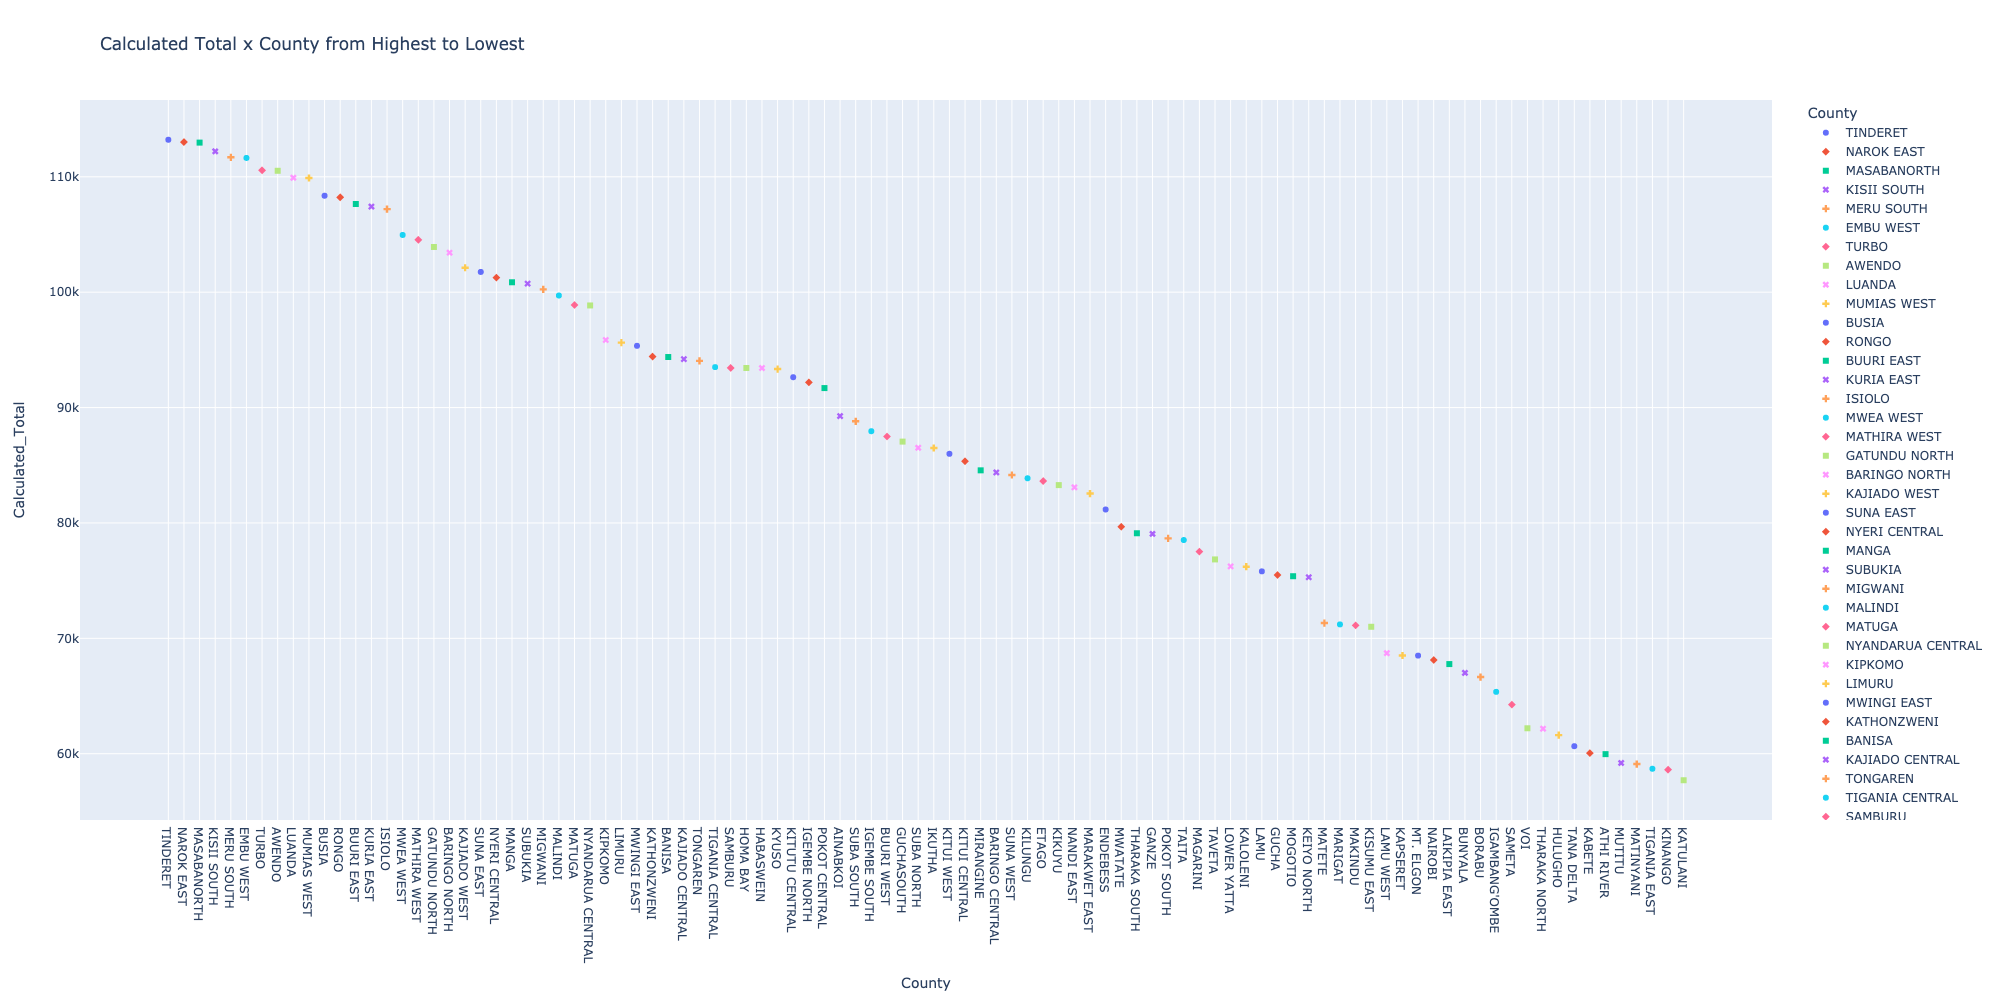

In [50]:
# Created a scatter plot that organized the calculated totals from highest to lowest
lowProdCalcTotalAsc = lowProduction.sort_values(['Calculated_Total'], ascending=False)
fig = px.scatter(lowProdCalcTotalAsc, y="Calculated_Total", x="County", color="County", height = 700, width = 2000, title="Calculated Total x County from Highest to Lowest",  symbol="County")
fig.show("png")

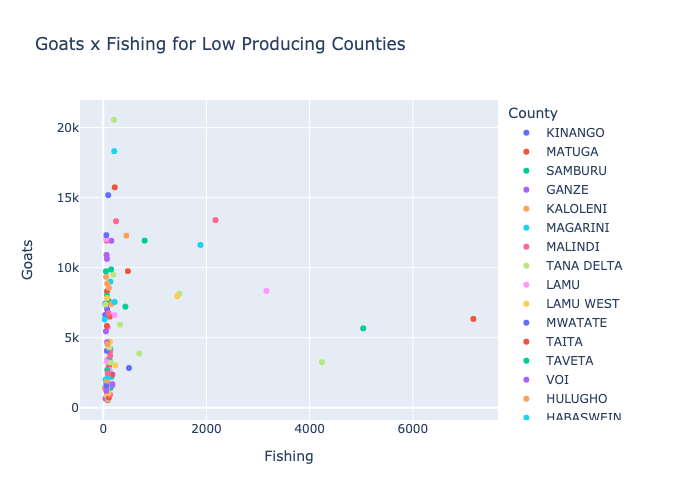

In [51]:
# Pretty cool graph depicting Goats by Fishing. Suba North has about the same amount of fishing, and goats, 7173, and 6336 respectively.
# However it is clear that there are more goats, than fishing in low producing counties
# In python, we can actually scroll down and see all the counties, as well as seeing the name and variable data point
# when hovering over a certain dot.

fig = px.scatter(lowProduction, x="Fishing", y="Goats", color="County",
                 title="Goats x Fishing for Low Producing Counties")

fig.show("png")

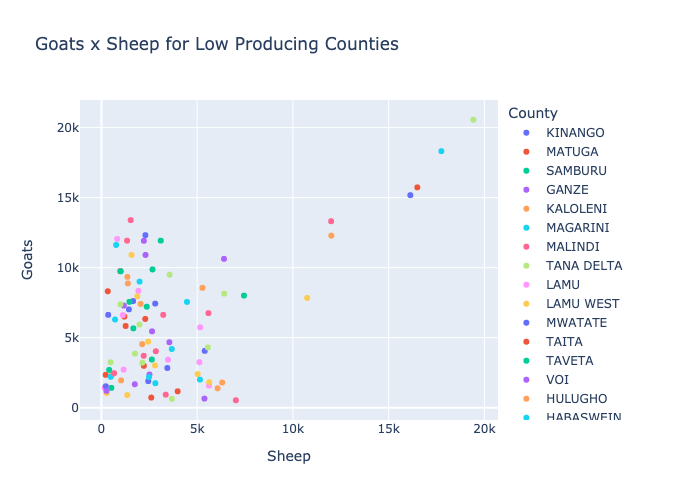

In [52]:
# Wow, islio produces about 20,00 goats and 20,000 sheep
fig = px.scatter(lowProduction, x="Sheep", y="Goats", color="County",
                 title="Goats x Sheep for Low Producing Counties")

fig.show("png")

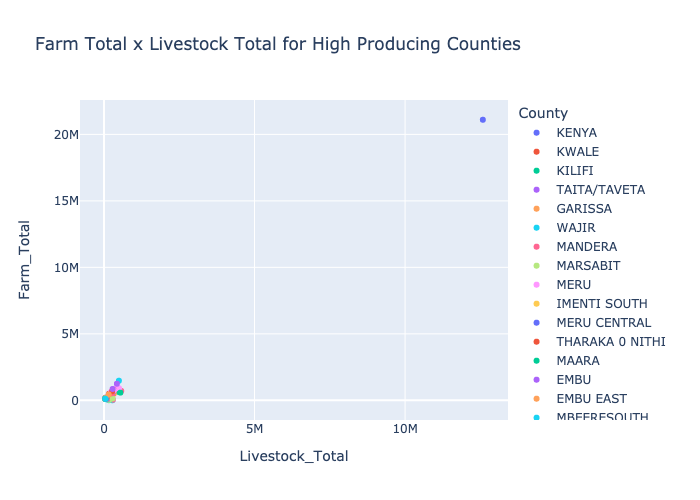

In [53]:
fig = px.scatter(highProduction, x="Livestock_Total", y="Farm_Total", color="County",
                 title="Farm Total x Livestock Total for High Producing Counties")
fig.show("png")

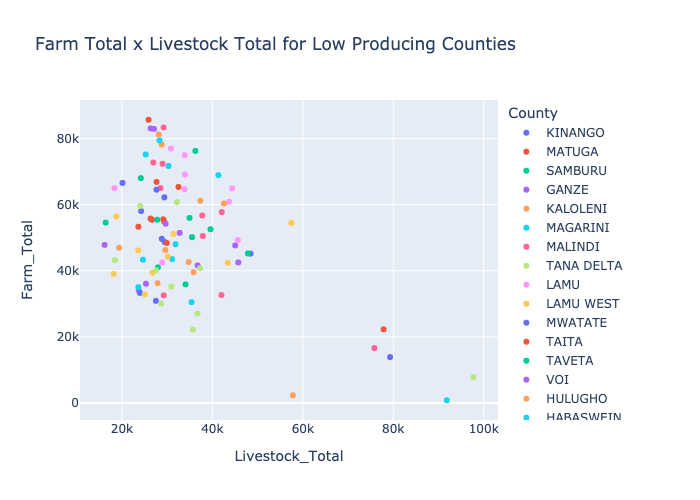

In [54]:
fig = px.scatter(lowProduction, x="Livestock_Total", y="Farm_Total", color="County",
                 title="Farm Total x Livestock Total for Low Producing Counties")
fig.show("png")

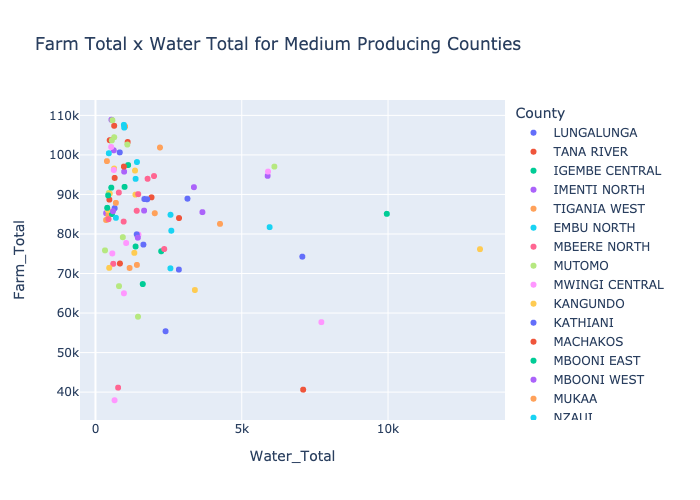

In [55]:
fig = px.scatter(mediumProduction, x="Water_Total", y="Farm_Total", color="County",
                 title="Farm Total x Water Total for Medium Producing Counties")
fig.show("png")

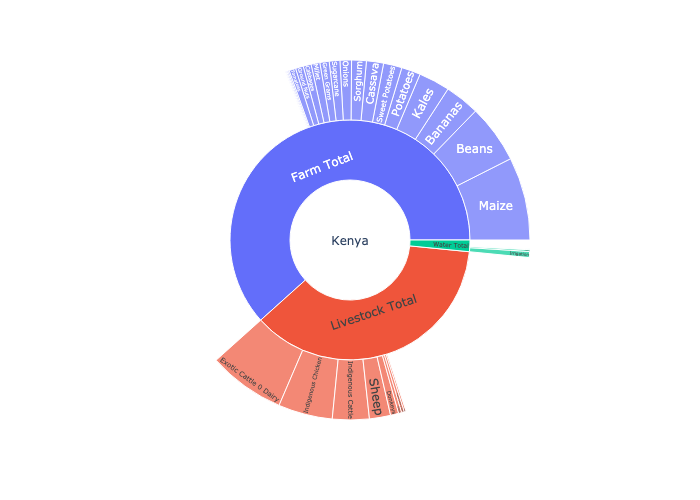

In [56]:
# Im really proud of this graph, a sunburst graph displaying the relative production for each sector, and their constituents.
data = dict(
    character=["Farm Total", "Livestock Total","Water Total","Aquaculture","Fishing","Irrigation","Fish Ponds","Fish Cages","Maize","Sorghum" ,"Rice","Potatoes","Beans","Bananas","Cabbages","Tomatoes","Onions","Ground Nuts","Millet","Watermelons","Kales","Sugarcane","Cotton","Cassava","Sweet Potatoes","Wheat","Green Grams","Exotic Cattle 0 Dairy","Exotic Cattle 0 Beef","Indigenous Cattle","Sheep","Goats","Camel","Donkeys","Pigs","Indigenous Chicken"],
    parent = ['Kenya',"Kenya","Kenya","Water Total","Water Total", "Water Total", "Water Total", "Water Total", "Farm Total", "Farm Total", "Farm Total","Farm Total","Farm Total", "Farm Total","Farm Total","Farm Total",'Farm Total',"Farm Total" ,"Farm Total","Farm Total","Farm Total","Farm Total","Farm Total","Farm Total","Farm Total","Farm Total","Farm Total","Livestock Total","Livestock Total","Livestock Total","Livestock Total","Livestock Total","Livestock Total","Livestock Total","Livestock Total","Livestock Total"],
    value = [21101949, 12582590, 534024 , 29325 , 109640 , 369679 , 22019 , 3361 , 5104967 , 904945 , 50484, 1170170 , 3600840 , 2139421 , 490588,410224 , 707182 , 480812 , 540353, 84077 , 1916898, 654468 , 22920 , 1050352 , 1134102, 67720,571426 , 4729288, 167625,2260439,1299893,189887,16766,500682,110383,3337700
            ])

fig = px.sunburst(
    data,
    names='character',
    parents='parent',
    values='value',
)
fig.show("png")

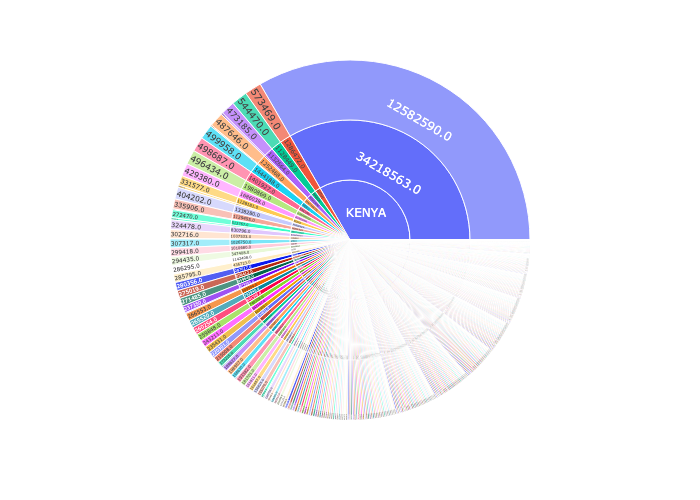

In [58]:
# Really busy graph due to sample size, however this automatically applies certain columns from the data frame
# in this example the inner ring is Calculated Total, and the outer ring is Livestock Total.
fig = px.sunburst(df, path=['County', 'Calculated_Total', 'Livestock_Total'], values='Livestock_Total')
fig.show("png")

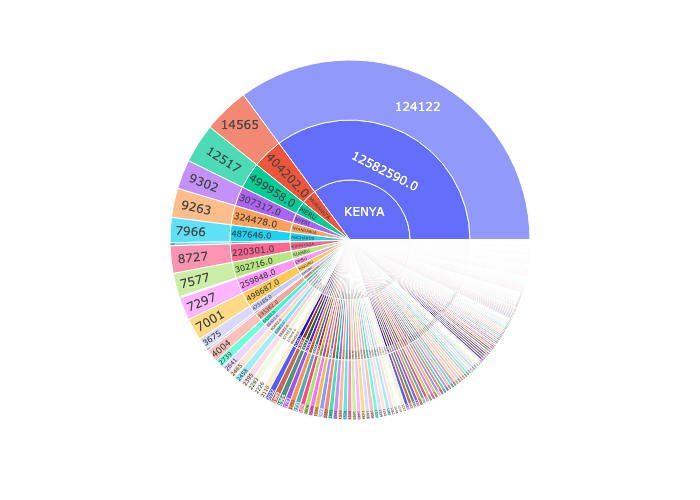

In [59]:
# In this example, the inner ring is Livestock Total, and the outside is number of rabbits compared to livestock total
# We can double checking using the df.head() below. 
fig = px.sunburst(df, path=['County', 'Livestock_Total', 'Rabbits'], values='Rabbits')
fig.show("png")

In [36]:
# Funnel Graph Displaying, and visualizing the rankings of kenya, and its sectors.
data = dict(
    number=[34218593,21101949,12582590,534024],
    Sector_Total=["Calculated Total","Farm Total","Livestock Total","Water Total"])
fig = px.funnel(data, x='number', y='Sector_Total',title="Kenya Sector Total Ranking")
fig.show()

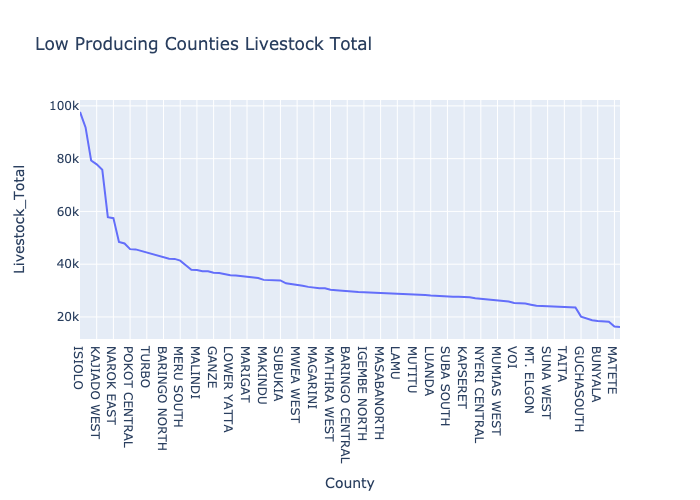

In [60]:
lowProdLiveTotalAsc = lowProduction.sort_values(['Livestock_Total'], ascending=False)
fig = px.line(lowProdLiveTotalAsc, x="County", y="Livestock_Total",title="Low Producing Counties Livestock Total")
fig.show("png")

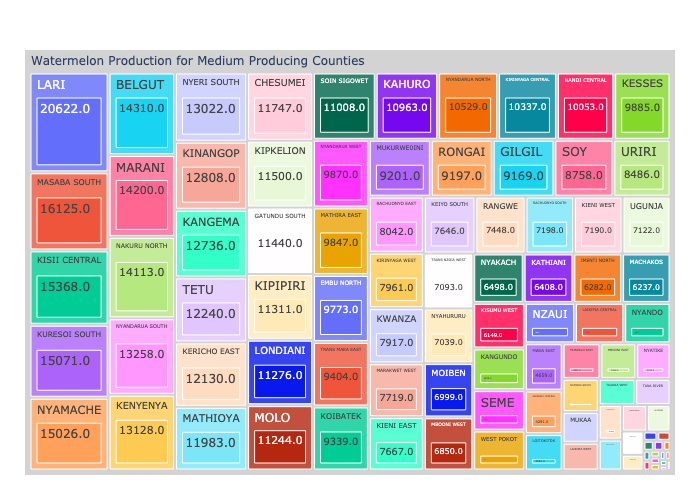

In [61]:
# I really love this graph too, it displays the county, and watermelon production for each county straight from the dataset.
# Also, im sure the viewer has likely gathered, sizes each box proportional to the relative quantity of the subset. 
fig = px.treemap(mediumProduction, path=[px.Constant("Watermelon Production for Medium Producing Counties"), 'County', 'Watermelons'], values='Watermelons')
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show("png")

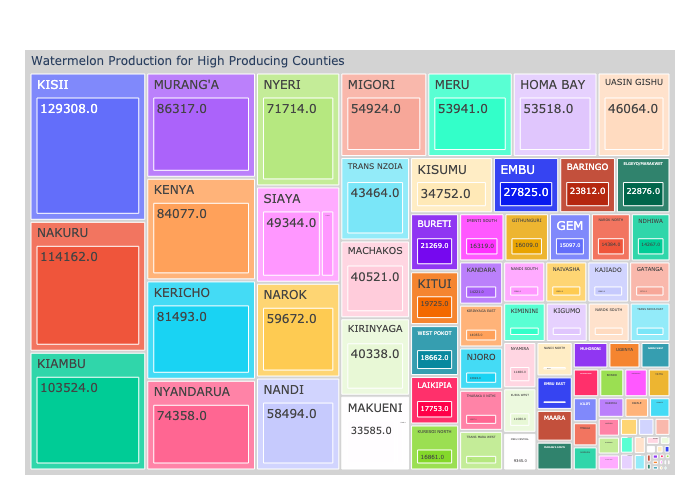

In [62]:
# Woah, I never would have guessed KISII and more, would produce more watermelons than Kenya, or any county to produce anything more than Kenya.
fig = px.treemap(highProduction, path=[px.Constant("Watermelon Production for High Producing Counties"), 'County', 'Watermelons'], values='Watermelons')
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show("png")

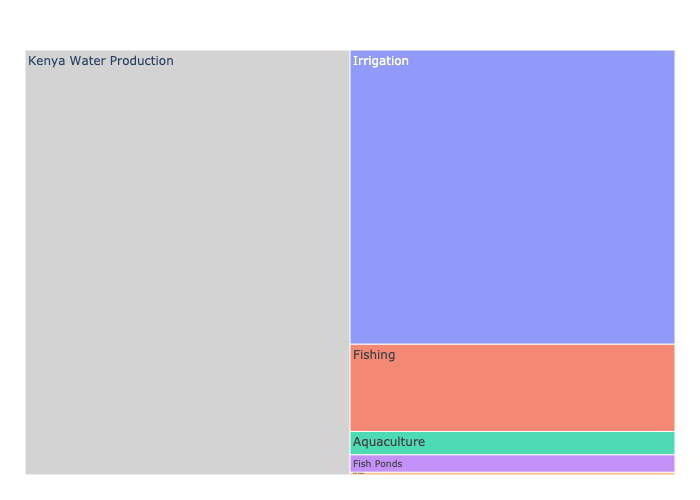

In [63]:
# Iceberg graph displaying a sector, and its consituents.
# really cool, because in python if you hover over the sector, it displays the variable value.
# all plotly graphs do this, which I think is a major reason they are better than matplotlib
data = dict(
    
    # 7 Characters
    character=["Fishing","Aquaculture","Irrigation","Fish Ponds","Fish Cages"],
    parent = ["Kenya Water Production","Kenya Water Production","Kenya Water Production","Kenya Water Production","Kenya Water Production"],
    value=[109640,29325,369679,22019,3361])

fig =px.icicle(
    data,
    names='character',
    parents='parent',
    values='value',
)
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show("png")

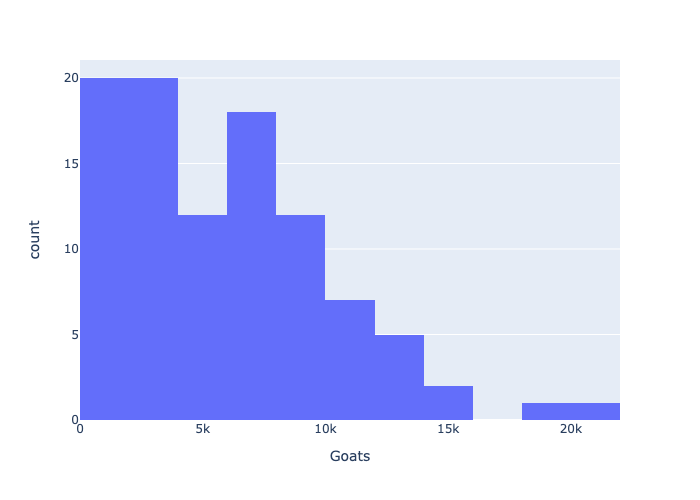

In [64]:
# Histogram showing frequence of Goats
fig = px.histogram(lowProduction, x="Goats")
fig.show("png")

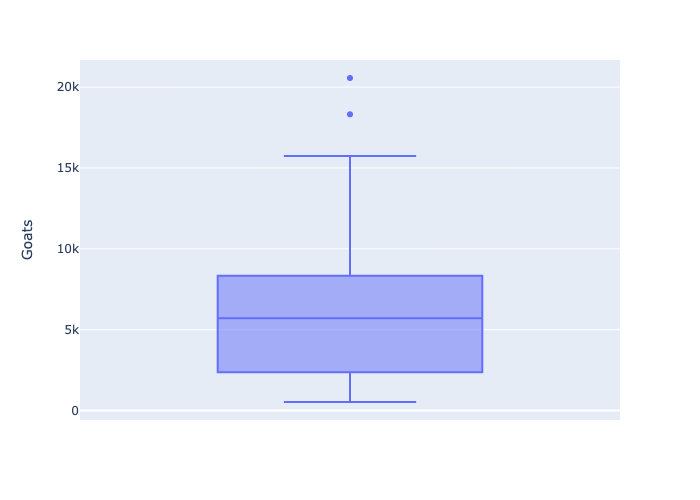

In [65]:
# Box plot showing descriptive statistics for Low Producing Counties, and Goats

fig = px.box(lowProduction, y="Goats")
fig.show("png")

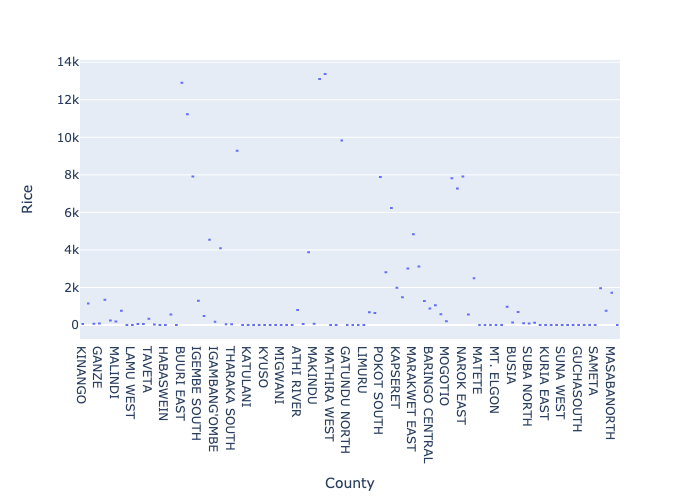

In [66]:
# Box chart displaying all the counties and Rice, but since the sample size is so high, the graph is funky
# But I left it in the project just to show it is possible.
fig = px.box(lowProduction, x="County", y="Rice")
fig.show("png")

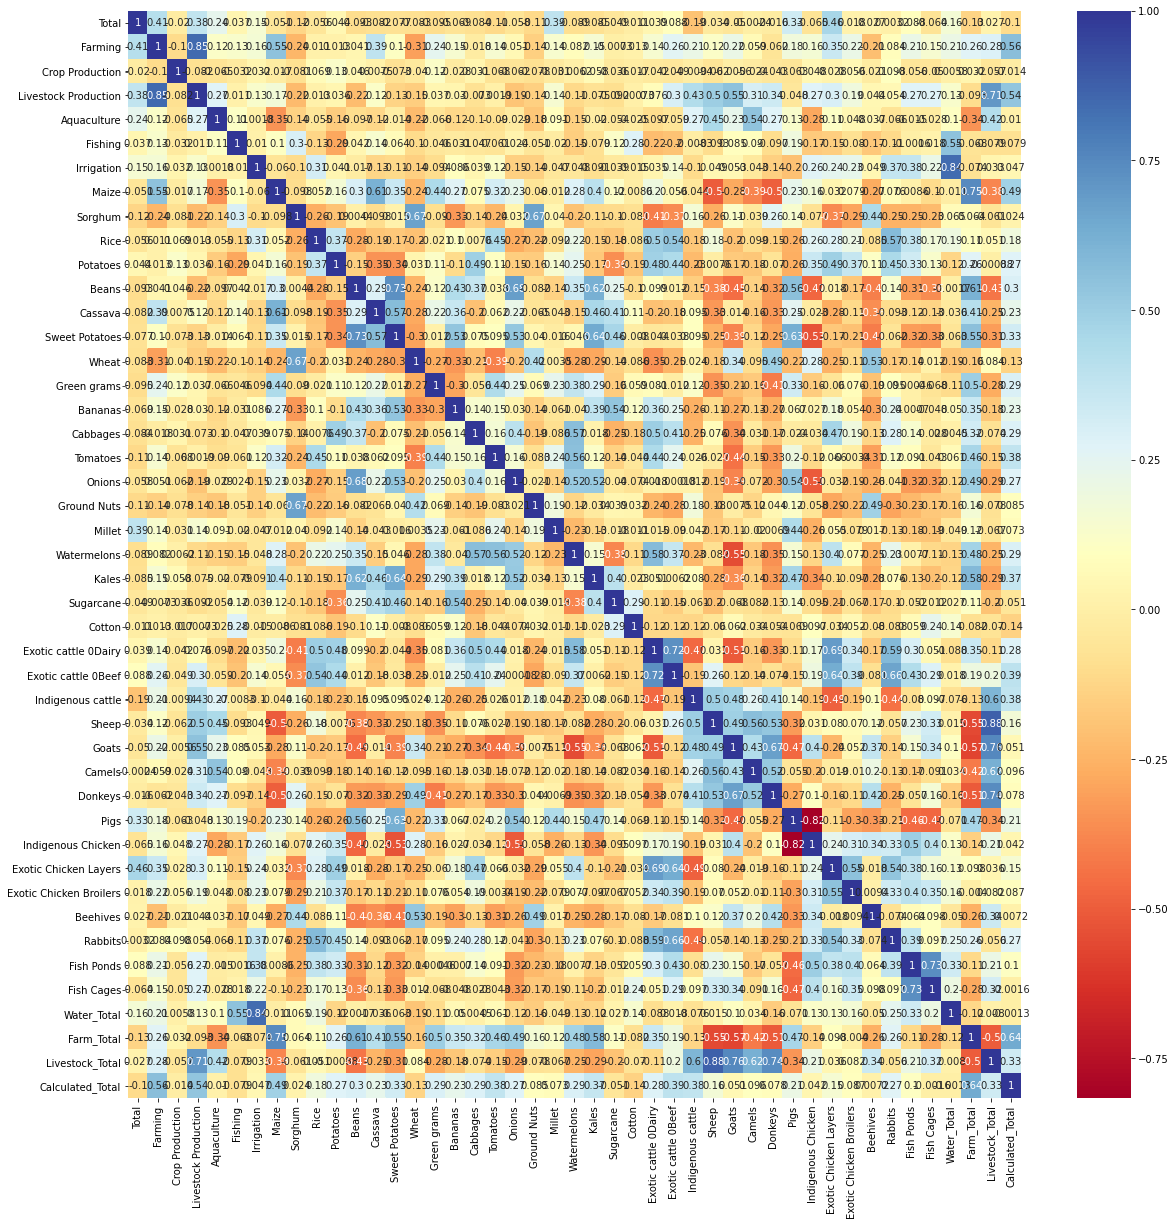

In [69]:
# Correlation graph displaying correlations for the low producing counties  
plt.figure(figsize=(20,20))
cor = lowProduction.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.RdYlBu)
plt.show()

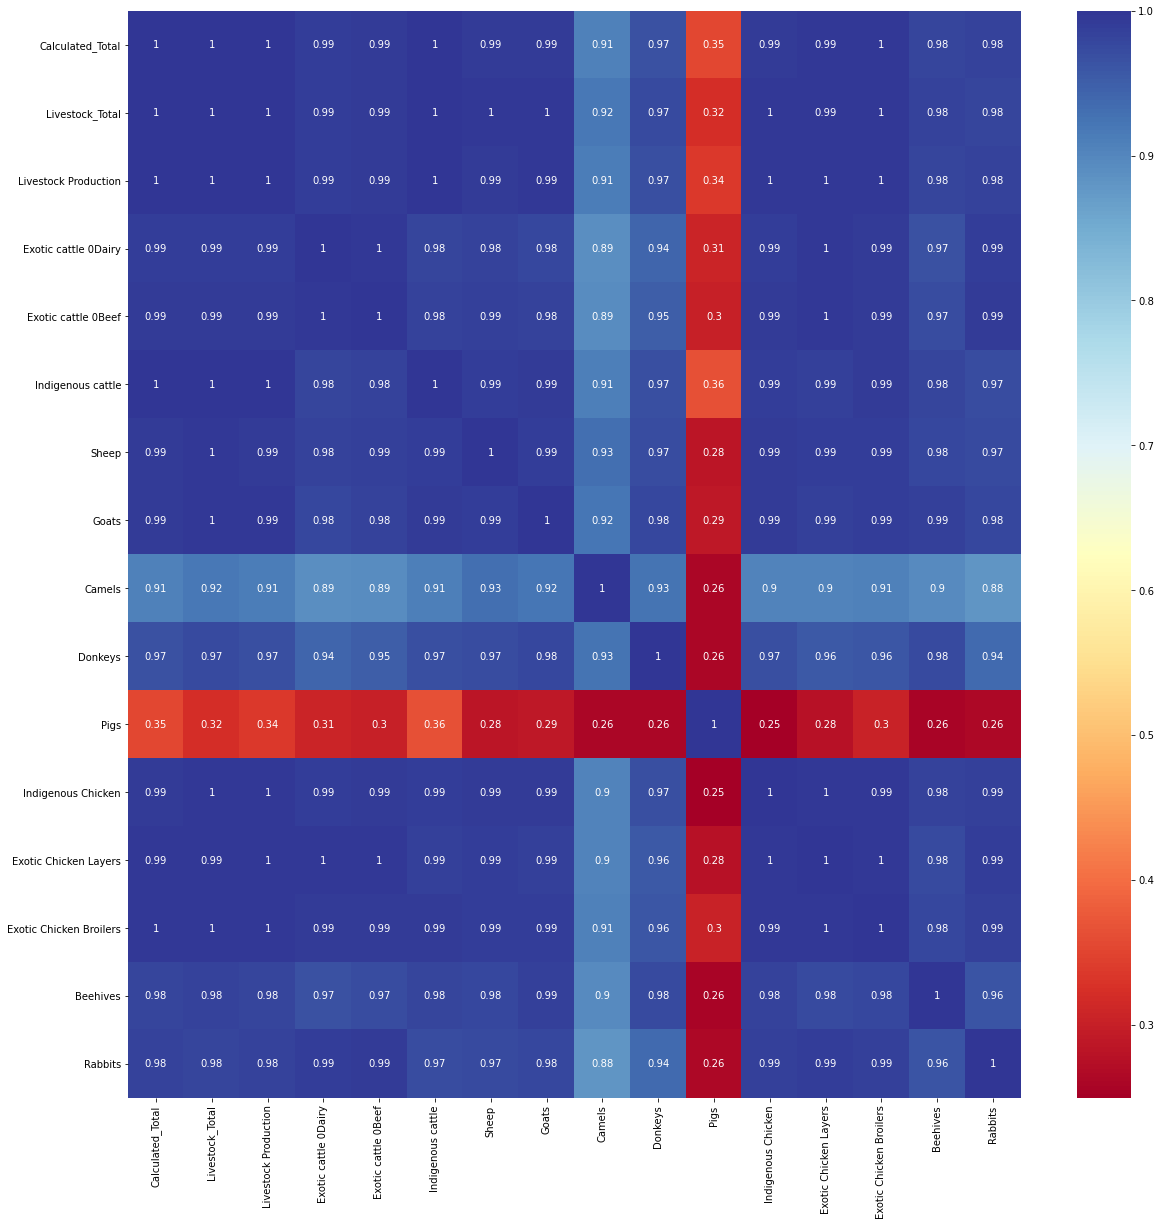

In [100]:
# Correlation graph displaying the livestock correlations for all counties  
# Interesting, pigs have a low correlation with most, if not all of the correlating variables.
plt.figure(figsize=(20,20))
cor = Livestock.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.RdYlBu)
plt.show()